<img src="ts_finger.jfif" width="600" height="200" align="right"/>

# Time Series Analysis: ARMA Models

Author: Christoph Güttner


**Abstract**  
Two ARMA processes - (1,1) and (3,2) - are generated, analysed  
(autocorrelation and stationarity) as well as inter- and extrapolated.  
Therefor daily data of one year (2020) is used to train  
the respective ARMA Model and predict three further months  
(- March 2021).

In general, an ARMA process $y_t$ is described by an  
Auto Regressive Part (AR: $y_t =\sum_{i=1}^{p} a_i y_{t-i}$)  
and a Moving Average Part (MA: $y_t =\sum_{j=1}^{q} b_j \epsilon_{t-j}$),  
which are combined in the following way:

$y_t = c + \epsilon_t + \sum_{i=1}^{p} a_i y_{t-i} + \sum_{j=1}^{q} b_j \epsilon_{t-j}$  

The AR Part describes a long term dependency of time series data,  
while the error terms are independend and normally distributed  
  
$\epsilon= N(\mu=0, \sigma)$  
  
at each timestep and have therfore only short term effects.


## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)

* [ARMA Process](#Model_Selection)
    * [ARMA Process(1,1)](#ARMA_Process(1,1))
    * [ARMA Process(3,2)](#ARMA_Process(3,2))
      
* [(Partial-) Autocorrelation](#Partial_Autocorrelation)
* [Dickey Fuller Test](#Dickey_Fuller_Test)
  
* [ARMA Model](#ARMA_Model)
    * [ARMA Model(1,1)](#ARMA_Model(1,1))
    * [ARMA Model(3,2)](#ARMA_Model(3,2))
    * [Model Summary](#Model_Summary)
      
* [ARMA Model Predictions](#ARMA_Model_Predictions)

## Class Imports

In [276]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [227]:
#functions
def generate_ARMA(p, q, a, b, c, sigma, y, n_samples):
    y = np.float64(np.zeros(n_samples))
    epsilon = np.float64(np.zeros(n_samples))

    for t in range(p, n_samples):
        sum = 0.0
        for i in range(1,p+1):
            sum += a[i-1] * y[t-i]
        for j in range(1,q+1):
            epsilon[t-j] = np.float64(np.random.normal(0.0, sigma))
            sum += b[j-1] * epsilon[t-j]
        epsilon[t] = np.float64(np.random.normal(0.0, sigma))
        y[t] = np.float64(c) + np.float64(epsilon[t]) + sum

    return y


def dickey_fuller(ts):
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

## ARMA_Process

In [228]:
date_index = pd.date_range(start='1/1/2020', end='3/1/2021')

 
### ARMA(1,1)_Process:
   
$y_{t} = 0.5 + \epsilon_{t} + 0.75 * y_{t-1} + 0.02 * \epsilon_{t-1}$




In [229]:
p=1
q=1
a=[0.75]
b=[0.02]
c=0.5
y=0
sigma = 1.0
n_samples = len(date_index)

np.random.seed(1)
ARMA_Process11 = generate_ARMA(p, q, a, b, c, sigma, y, n_samples)

In [230]:
data11={'TS_11':ARMA_Process11}
df11 = pd.DataFrame(data11, index=date_index)
df11.head(3)

,TS_11
2020-01-01,0.000000
2020-01-02,-0.079270
2020-01-03,-0.642984


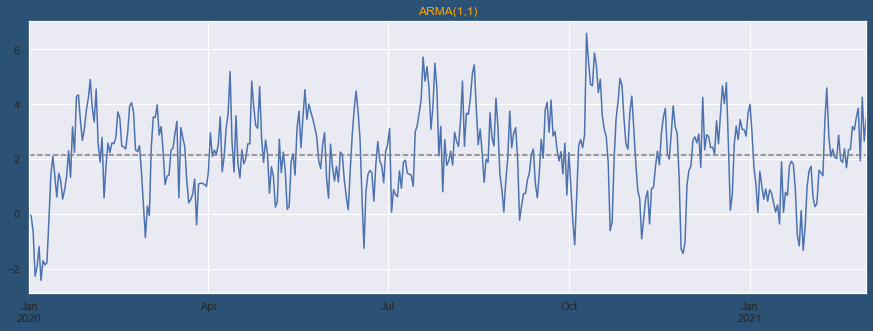

In [291]:
plt.figure(facecolor='#2B5275')
df11['TS_11'].plot(figsize=(15,5))
plt.axhline(df11['TS_11'].mean(), linestyle='--', color='grey')
plt.title('ARMA(1,1)', color='orange')
plt.show()


### ARMA(3,2) Process:  
  
$ y_{t} = 0,5 +\epsilon_{t} + 0.35 * y_{t-1} + 0.16 * y_{t-2} + 0.3* y_{t-3} + 0.02 *\epsilon_{t-1} + 0.07 *\epsilon_{t-2} $

In [232]:
p=3
q=2
a=[0.35, 0.16, 0.3]
b=[0.02, 0.07]
c=0.5
y=0
sigma = 1.0
n_samples = len(date_index)

np.random.seed(3)
ARMA_Process32 = generate_ARMA(p, q, a, b, c, sigma, y, n_samples)


In [233]:
data32={'TS_32':ARMA_Process32}
df32 = pd.DataFrame(data32, index=date_index)
df32.head(3)

,TS_32
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0


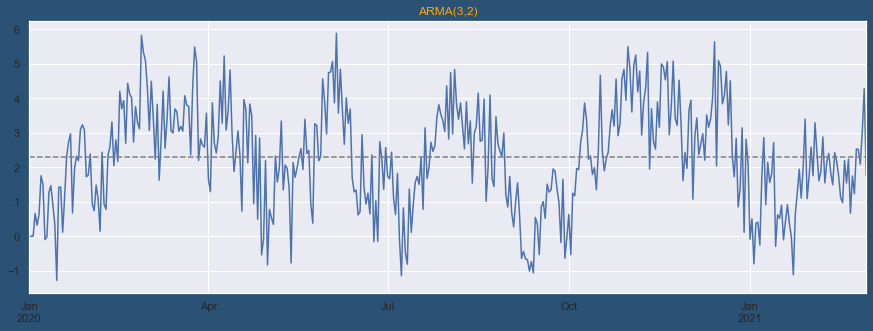

In [292]:
plt.figure(facecolor='#2B5275')
df32['TS_32'].plot(figsize=(15,5))
plt.axhline(df32['TS_32'].mean(), linestyle='--', color='grey')
plt.title('ARMA(3,2)', color='orange')
plt.show()

## (Partial-)_Autocorrelation

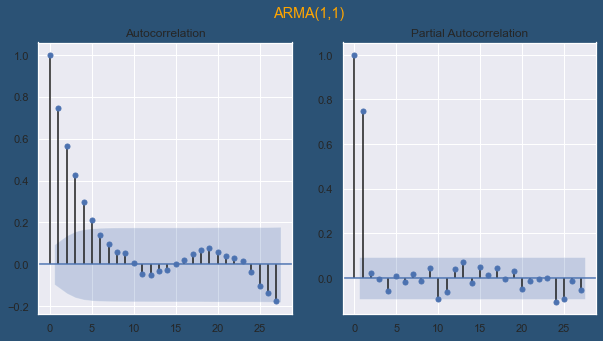

In [293]:
fig = plt.figure(figsize=(10,5),facecolor='#2B5275')
fig.suptitle('ARMA(1,1)', color ='orange')
ax = fig.add_subplot(1,2,1)
plot_acf(df11['TS_11'], ax=ax)
ax = fig.add_subplot(1,2,2)
plot_pacf(df11['TS_11'], ax=ax)
plt.show()

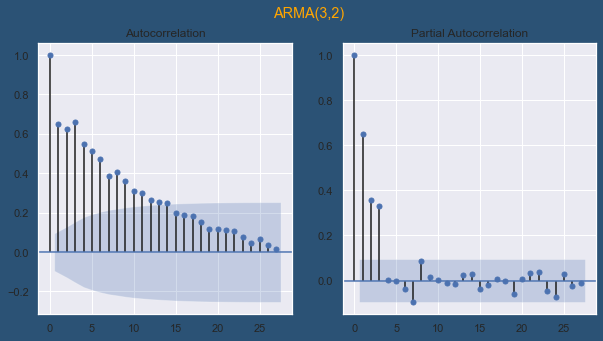

In [294]:
fig = plt.figure(figsize=(10,5),facecolor='#2B5275')
fig.suptitle('ARMA(3,2)', color ='orange')
ax = fig.add_subplot(1,2,1)
plot_acf(df32['TS_32'], ax=ax)
ax = fig.add_subplot(1,2,2)
plot_pacf(df32['TS_32'], ax=ax)
plt.show()

## Dickey_Fuller_Test

Testing for stationarity as a requirement for ARMA Modeling (parameter fitting)

### For ARMA(1,1) Process

In [237]:
dickey_fuller(df11['TS_11'])

ADF Statistic: -7.837309
p-value: 0.000000
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Reject Ho - Time Series is Stationary


### For ARMA(3,2) Process

In [238]:
dickey_fuller(df32['TS_32'])

ADF Statistic: -4.179263
p-value: 0.000714
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Reject Ho - Time Series is Stationary


## ARMA_Modell_Prediction

### Train Test Split

In [239]:
df_train11 = df11['1/1/2020':'1/1/2021']
df_test11 = df11['1/1/2021':'3/1/2021']

df_train32 = df32['1/1/2020':'1/1/2021']
df_test32 = df32['1/1/2021':'3/1/2021']

## ARMA(1,1)_Model

In [240]:
model11 = ARIMA(df_train11, order=(1,0,1))
model_fit11 = model11.fit()
print(model_fit11.summary())


                               SARIMAX Results                                
Dep. Variable:                  TS_11   No. Observations:                  367
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -525.707
Date:                Sat, 06 Mar 2021   AIC                           1059.415
Time:                        19:06:23   BIC                           1075.036
Sample:                    01-01-2020   HQIC                          1065.621
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2527      0.205     10.968      0.000       1.850       2.655
ar.L1          0.7441      0.049     15.283      0.000       0.649       0.839
ma.L1          0.0053      0.070      0.076      0.9

## ARMA(3,2)_Model

In [241]:
model32 = ARIMA(df_train32, order=(3,0,2))
model_fit32 = model32.fit()
print(model_fit32.summary())


                               SARIMAX Results                                
Dep. Variable:                  TS_32   No. Observations:                  367
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -527.638
Date:                Sat, 06 Mar 2021   AIC                           1069.276
Time:                        19:06:24   BIC                           1096.613
Sample:                    01-01-2020   HQIC                          1080.138
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3189      0.354      6.547      0.000       1.625       3.013
ar.L1          0.3055      0.201      1.518      0.129      -0.089       0.700
ar.L2          0.1990      0.192      1.038      0.2

## Model_Summary

### ARMA(1,1): 
   
$y_{t} = c+ \epsilon_{t}+ 0.7441 * y_{t-1} + 0.0053 * \epsilon_{t-1}$  
  
$\frac{1}{N}\sum_{i=1}^{N} y_{t}= 2.2527 $
### ARMA(3,2):  
  
$y_{t} = c+ \epsilon_{t} + 0.3055 * y_{t-1}+ 0.1990  * y_{t-2} + 0.3526 * y_{t-2} - 0.0169 *\epsilon_{t-1} + 0.0162  *\epsilon_{t-2} $  
   
$\frac{1}{N}\sum_{i=1}^{N} y_{t}= 2.3189 $


## Model_Prediction

<Figure size 432x288 with 0 Axes>

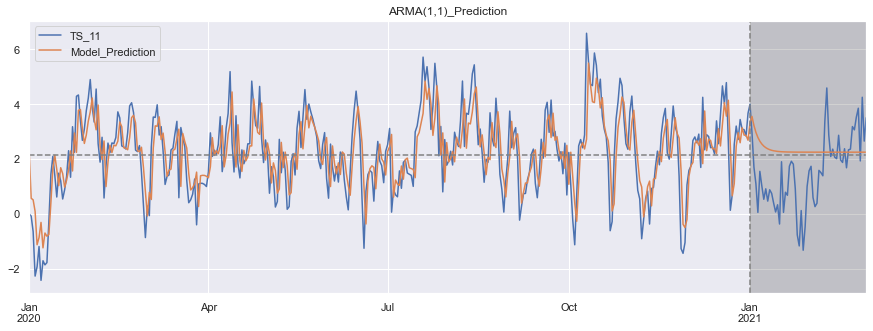

In [289]:
prediction_pred = model_fit11.predict(start='1/1/2020', end='3/1/2021')
prediction_pred = pd.Series(prediction_pred, index=df11.index)
df11['Model_Prediction'] = prediction_pred

plt.figure(facecolor='#2B5275')
df11.plot(figsize=(15,5))
#ax.set_facecolor('#457277')
plt.axhline(df11['TS_11'].mean(), linestyle='--', color='grey')
plt.axvline('1/1/2021',linestyle='--', color='grey')
plt.title('ARMA(1,1)_Prediction')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.show()



<Figure size 432x288 with 0 Axes>

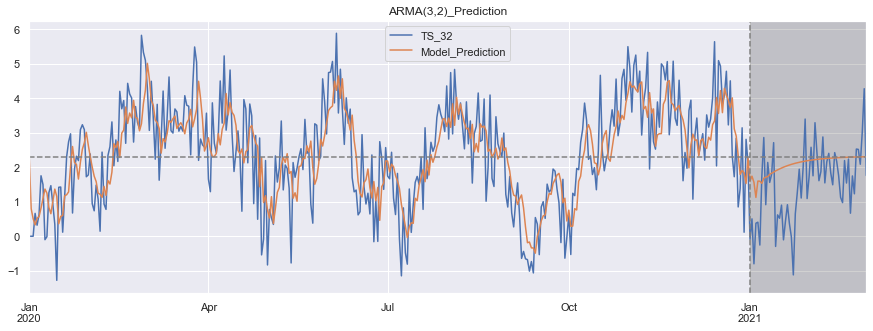

In [290]:
prediction_pred = model_fit32.predict(start='1/1/2020', end='3/1/2021')
prediction_pred = pd.Series(prediction_pred, index=df32.index)
df32['Model_Prediction'] = prediction_pred

plt.figure(facecolor='#2B5275')
df32.plot(figsize=(15,5))
plt.axhline(df32['TS_32'].mean(), linestyle='--', color='grey')
plt.axvline('1/1/2021',linestyle='--', color='grey')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.title('ARMA(3,2)_Prediction')
plt.show()